# **Predicción de la infección por el virus del SIDA**





# Proyecto Data Mining 
****
**Universidad Externado de Colombia**

**Ciencia de Datos**

**Data Mining**

**Equipo de trabajo**
   - **Edisson Fabian Tovar Castro**
   - **Luisa Fernanda Arévalo Salinas**
   - **Angélica Lorena Pinzón Rincón**
****
Velu, A. (2023). AIDS virus infection prediction [Conjunto de datos]. Kaggle. https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction/data

**Propósitos:**

* Poner en práctica los métodos de `Python` estudiados en el primer corte.

* Usar los conceptos estudiados en el primer corte para revelar información en una base de datos.

* Identificar el contexto y alguna oportunidad de negocios asociadas a una base de datos.

* Poner en práctica la redacción de secciones específicas de un proyecto.

* Emplear un lenguaje adecuado para dar cuenta de hallazgos realizados empleando técnicas de mineria de datos.  

# 2. Contextualización y problema
****

##  2.1. Contexto de la base de datos:
Este dataset proviene de un estudio **clínico** realizado en la década de **1990**, diseñado para investigar y comprender mejor la progresión del **SIDA** en pacientes que recibieron diferentes tipos de tratamientos **antirretrovirales**. Los datos fueron recolectados para analizar cómo diversos factores personales, históricos y médicos influyen en la probabilidad de infección y en la **progresión** de la enfermedad.

La base de datos incluye información detallada sobre el tiempo hasta un evento crítico o la censura de los pacientes, así como múltiples variables relacionadas con la demografía, el historial médico, el tipo de tratamiento recibido, y los resultados de laboratorio. Entre estas variables se encuentran la edad, el peso, la raza, el género, la actividad sexual, el historial de uso de drogas intravenosas, el estado funcional medido por la **escala de Karnofsky**, y varios indicadores de tratamientos y síntomas.

El objetivo principal de este conjunto de datos es proporcionar a los investigadores un recurso para estudiar la efectividad de diferentes regímenes de tratamiento, entender los factores de riesgo asociados con la infección por el virus del SIDA, y desarrollar modelos predictivos que puedan ayudar a personalizar el tratamiento y mejorar los resultados en pacientes con VIH/SIDA.

¿Qué representan las instancias de este conjunto de datos?.
- Registros sanitarios
- Pacientes con SIDA
- Sólo EE.UU.

##2.2. Descripción del problema
Con respecto a la riqueza del dataset podemos identificar cuales son los factores  que más influyen en el tratamiento antirretrovirales "El tratamiento antirretroviral (TAR) consiste en el uso de medicamentos contra el VIH para tratar dicha infección. Se recomienda para todas las personas con el VIH, y estas personas deben comenzar el TAR lo más pronto posible". Esto podria implicar el analisis de las celular CD4 y CD8 a lo largo del tiempo bajo diferentes tratamientos y antecedentes medicos.

Por ultimo y no menos importante  nos es posible identificar patrones de riesgo asociados con la progresion del SIDA, con relacion  entre los tratamientos y la evolucion de la carga viral o la supervivencia.

## 2.3. Pregunta orientadora

### **¿Cómo se Relacionan la Monoterapia y Terapia Combinada de Zidobudina, Didanosina, Zalcitabina  en el Conteo de Células CD4 y CD8 en Adultos de Edades Entre 12 y 68 años con VIH?**

# 3. Objetivos


## 3.1. Objetivo general

*   Examinar la eficacia de la Monoterapia y Terapia Combinada con Zidobudina, Didanosina y Zalcitabina en adultos de edades entre 12 y 68 años con VIH mediante tecnicas de Data Mining.



## 3.2. Objetivos específicos

*   Comparar la efectividad de la Monoterapia y Terapia Combinada con Zidobudina, Didanosina y Zalcitabina, en adultos de edades entre 12 y 68 años con VIH, analizando la disminución o crecimiento de células cd4 y cd8.

*   Contrastar la incidencia de VIH/SIDA de acuerdo a la Edad, Peso, Orientacion frente a la Monoterapia y Terapia combinada con Zidobudina, Didanosina y Zalcitabina en Adultos  de edades entre 12 y 68 años con VIH.

*   Estructurar la relación de Peso, Edad, Orientación, en la infección de VIH/SIDA en Adultos  de edades entre 12 y 68 años con VIH.

* Inspeccionar la Eficacia de la Monoterapia y Terapia Combinada con Zidobudina, Didanosina y Zalcitabina en Adultos Homosexuales de edades entre 12 y 68 años con VIH teniendo en cuenta si estos han desarrollado VIH/SIDA.


## 4.1. Librerías que serán empleadas

In [1]:
# Importación de bibliotecas generales
import warnings
import random
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

# Estadísticas
from scipy.stats import skew, kurtosis

# Modelos de machine learning y evaluación
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from catboost import CatBoostClassifier

# Deep Learning con TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Optimización
import optuna

# Configuraciones generales
# plt.style.use('dark_background')
%matplotlib inline
warnings.simplefilter('ignore', category=FutureWarning)

## 4.2. Cargue y descripción de la base de datos


In [2]:
# Rutas a los archivos CSV
archivo_csv = r'D:\Data Mining\proyecto_2\AIDS_Classification_50000.csv'
archivo_csv_1 = r'D:\Data Mining\proyecto_2\AIDS_Classification_5000.csv'

# Cargar los archivos CSV en DataFrames de pandas
df_50k = pd.read_csv(archivo_csv)
df_5k = pd.read_csv(archivo_csv_1)

# Mostrar las primeras filas del DataFrame para verificar la carga
df_5k.head()

time  trt  age      wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0   988    2   42  71.76131     0     0      0     100       0    1  ...   
1   413    3   30  72.67629     0     1      0     100       0    1  ...   
2  1119    0   37  73.75514     0     1      0      90       0    1  ...   
3   680    3   34  70.03769     0     0      0     100       0    0  ...   
4  1043    3   35  63.02845     0     0      0     100       0    1  ...   

   str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
0     1      3        0      0       0   290    408  1870   1671         0  
1     0      1        0      0       0   506    446  1372    523         0  
2     1      3        0      0       0   499    542   609   1474         0  
3     0      1        0      1       0   313    478   780    987         0  
4     0      1        0      1       0   337    761   698   1735         0  

[5 rows x 23 columns]

In [3]:
df_5k.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

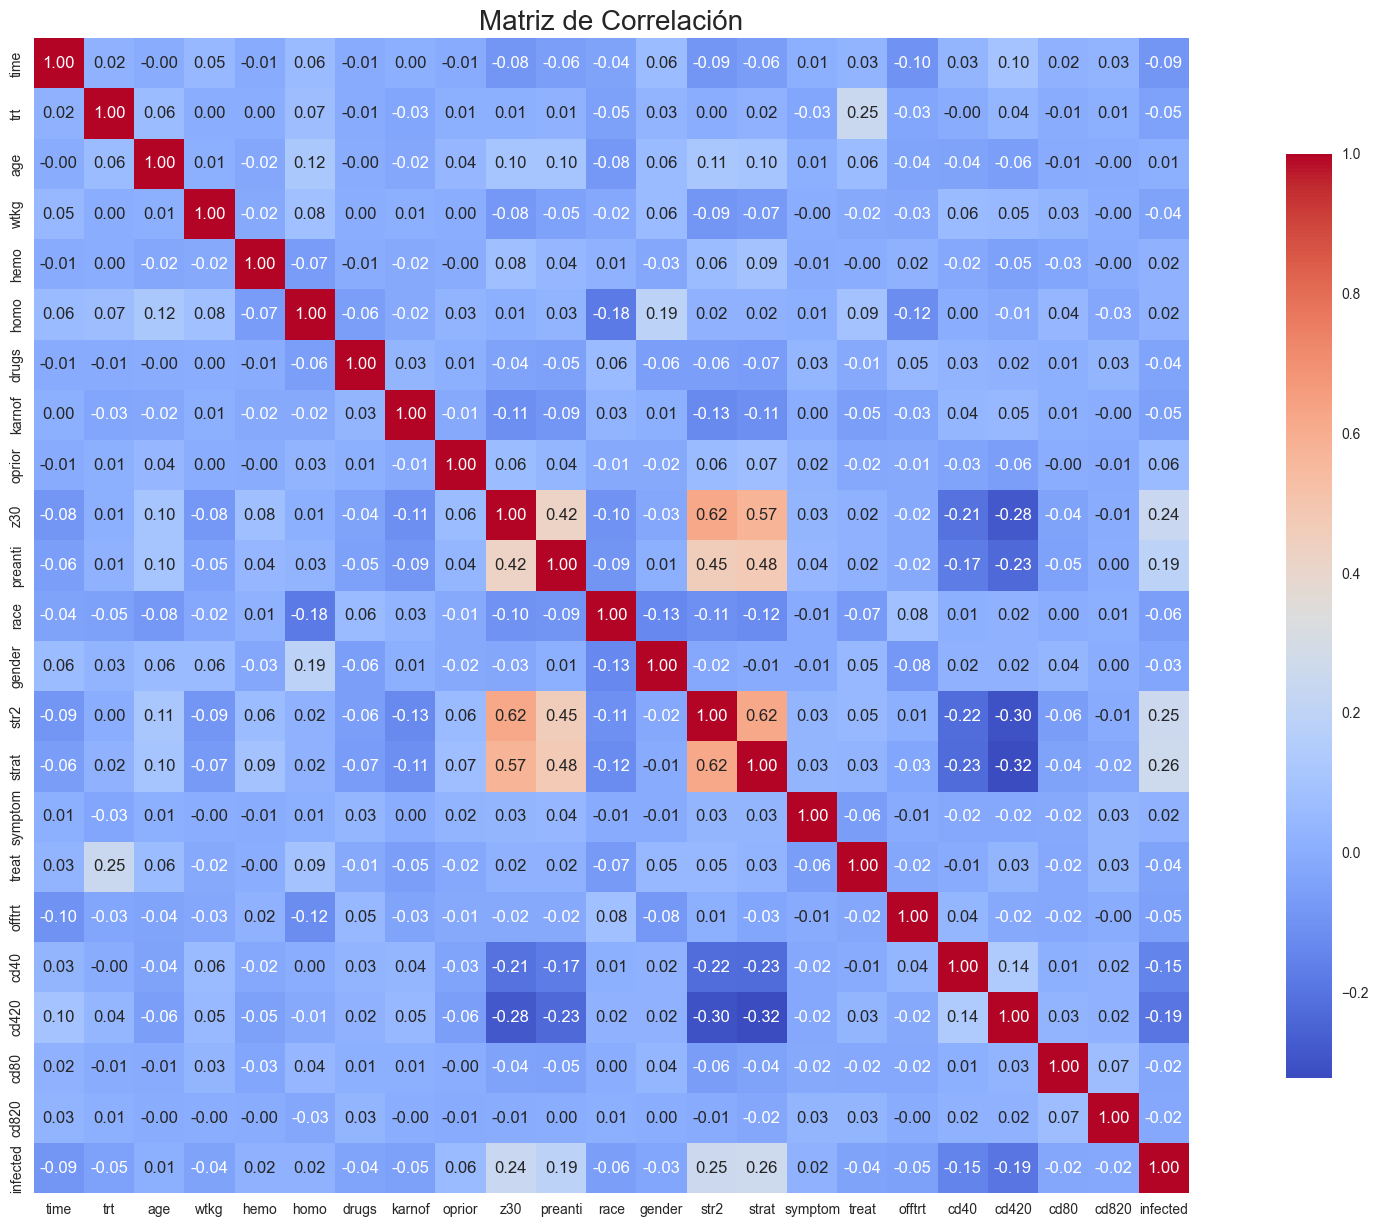

In [4]:
# Calcular la matriz de correlación
corr_matrix = df_5k.corr(method='pearson')  # o 'spearman' según tu caso

# Ajustar el tamaño de la figura
plt.figure(figsize=(25, 15))  # Cambia los valores según lo que necesites

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación', fontsize=20)  # Título más grande
plt.show()

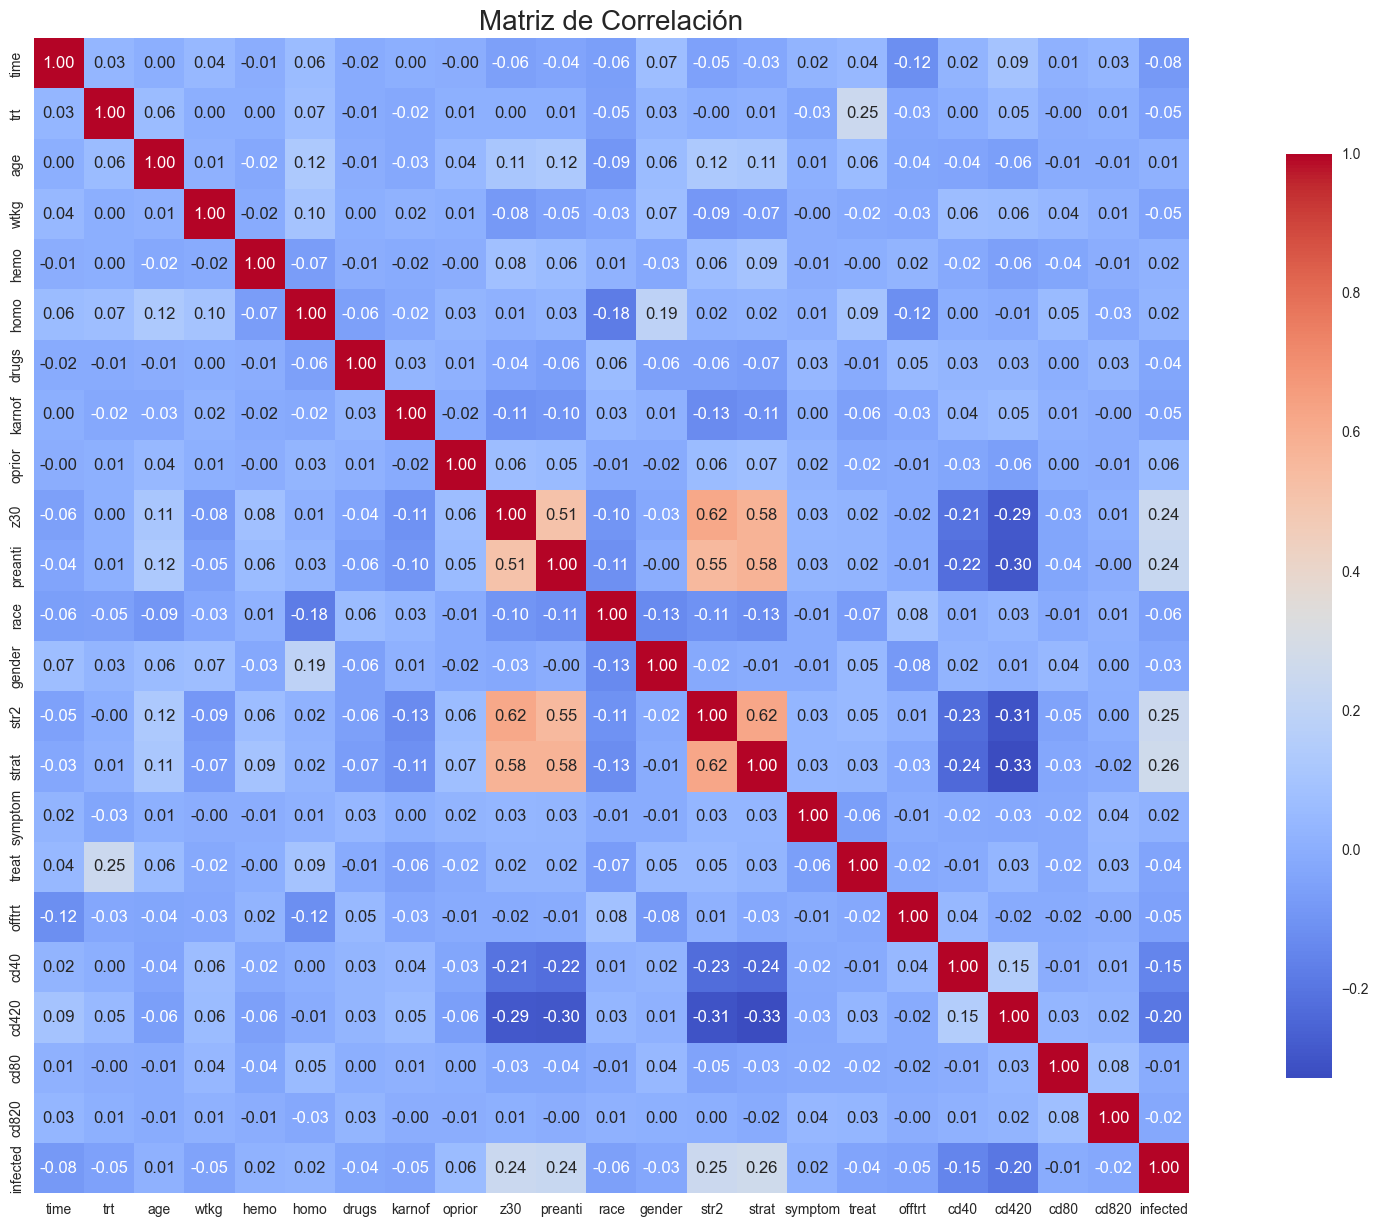

In [5]:
# Calcular la matriz de correlación
corr_matrix = df_5k.corr(method='spearman')  # o 'spearman' según tu caso

# Ajustar el tamaño de la figura
plt.figure(figsize=(25, 15))  # Cambia los valores según lo que necesites

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación', fontsize=20)  # Título más grande
plt.show()

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# # Importar el módulo 'files' desde la biblioteca 'google.colab' para manejar archivos en Google Colab
# from google.colab import files

# # Permitir al usuario subir archivos desde su máquina local al entorno de Google Colab
# # La función 'files.upload()' abre un cuadro de diálogo para seleccionar y subir archivos
# uploaded = files.upload()

# # Leer el archivo CSV subido y cargarlo en un DataFrame de pandas
# df_5k = pd.read_csv("/content/AIDS_Classification_5000.csv")

In [8]:
# # Importar el módulo 'files' desde la biblioteca 'google.colab' para manejar archivos en Google Colab
# from google.colab import files

# # Permitir al usuario subir archivos desde su máquina local al entorno de Google Colab
# # La función 'files.upload()' abre un cuadro de diálogo para seleccionar y subir archivos
# uploaded = files.upload()

# # Leer el archivo CSV subido y cargarlo en un DataFrame de pandas
# df_50k = pd.read_csv("/content/AIDS_Classification_50000.csv")

In [9]:
df_50k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

In [10]:
print(df_5k.columns)

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')


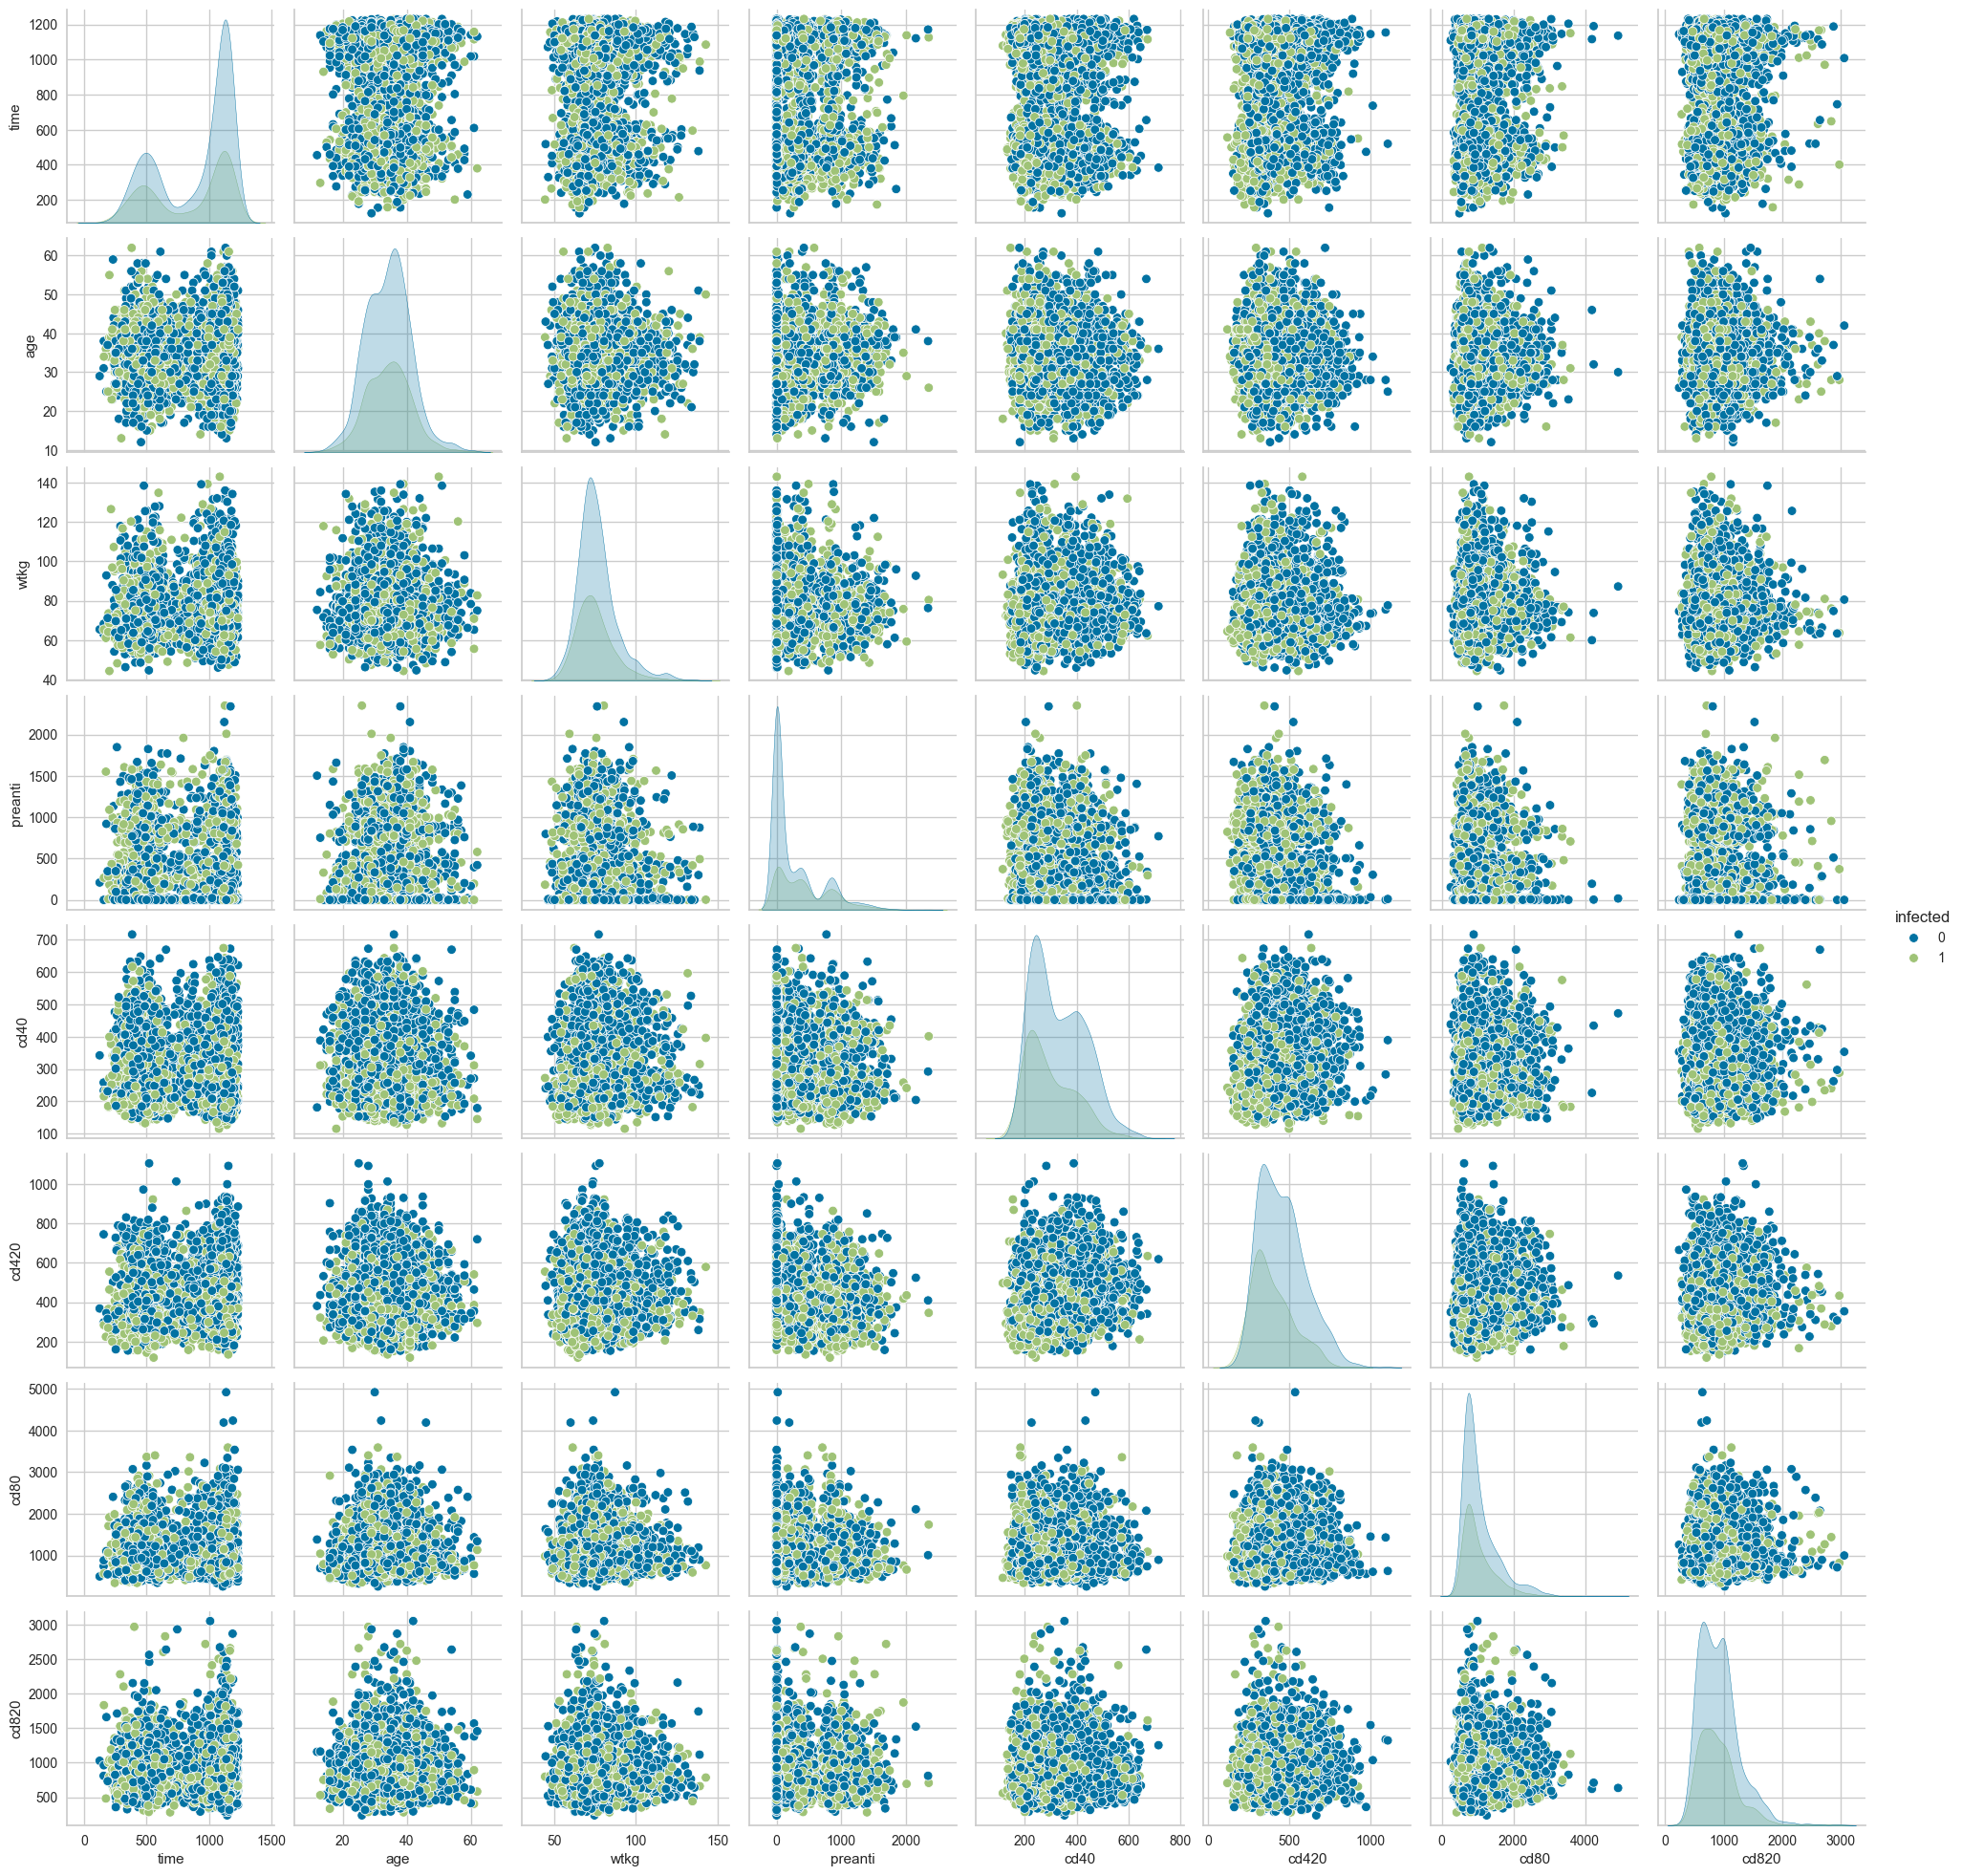

In [11]:
columns = ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']
sns.pairplot(df_5k[columns + ['infected']], hue="infected")
plt.show()

In [12]:
# Crear una copia del dataset original
scaled_df = df_5k.copy()

scaler = StandardScaler()
scaler.fit(scaled_df)
scaled_data2 = pd.DataFrame(scaler.transform(scaled_df),columns= scaled_df.columns )
print("Todas las características están escaladas")

Todas las características están escaladas


In [13]:
# Verificar que las columnas tienen media 0 y desviación estándar 1
print('media')
print(scaled_data2.mean().round(2))  # Debería ser aproximadamente 0
print('Desviacion estandar')
print(scaled_data2.std().round(2))   # Debería ser aproximadamente 1

media
time        0.0
trt         0.0
age        -0.0
wtkg       -0.0
hemo        0.0
homo       -0.0
drugs      -0.0
karnof      0.0
oprior      0.0
z30         0.0
preanti     0.0
race        0.0
gender      0.0
str2        0.0
strat       0.0
symptom    -0.0
treat      -0.0
offtrt     -0.0
cd40       -0.0
cd420      -0.0
cd80       -0.0
cd820      -0.0
infected   -0.0
dtype: float64
Desviacion estandar
time        1.0
trt         1.0
age         1.0
wtkg        1.0
hemo        1.0
homo        1.0
drugs       1.0
karnof      1.0
oprior      1.0
z30         1.0
preanti     1.0
race        1.0
gender      1.0
str2        1.0
strat       1.0
symptom     1.0
treat       1.0
offtrt      1.0
cd40        1.0
cd420       1.0
cd80        1.0
cd820       1.0
infected    1.0
dtype: float64


In [14]:
pca = PCA(n_components=3)
pca.fit(scaled_data2)
PCA_data2 = pd.DataFrame(pca.transform(scaled_data2), columns=(["col1","col2","col3"]))
PCA_data2.describe().T

count          mean       std       min       25%       50%       75%  \
col1  5000.0  7.673862e-17  1.778262 -3.693576 -1.685772  0.274683  1.523670   
col2  5000.0  8.526513e-18  1.275003 -4.591342 -0.814639  0.137739  0.961184   
col3  5000.0  7.105427e-18  1.118546 -4.038149 -0.754099  0.083576  0.800877   

           max  
col1  4.036457  
col2  2.842753  
col3  3.649685

In [15]:
len(PCA_data2)

5000

In [16]:
x =PCA_data2["col1"]
y =PCA_data2["col2"]
z =PCA_data2["col3"]

In [17]:
import plotly.express as px
# Crear el gráfico 3D interactivo
fig = px.scatter_3d(
    PCA_data2, 
    x='col1',  # Eje X
    y='col2',  # Eje Y
    z='col3',  # Eje Z
    width=1000,  # Ancho del gráfico
    height=800  # Altura del gráfico
)
# Mostrar el gráfico interactivo
fig.show()

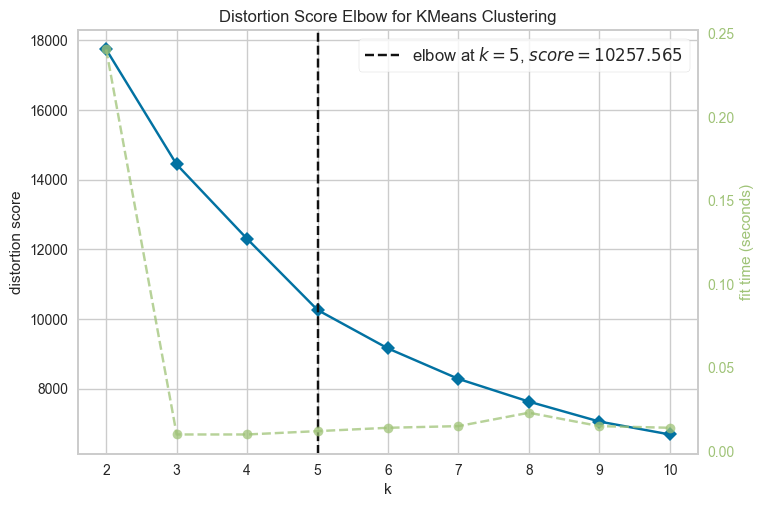

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
ElbowGraf = KElbowVisualizer(KMeans(), k=10)
ElbowGraf.fit(PCA_data2)
ElbowGraf.show()

In [19]:
AC = AgglomerativeClustering(n_clusters=4)

In [20]:
Cluster_AC = AC.fit_predict(PCA_data2)
PCA_data2["Clusters"] = Cluster_AC
df_5k["Clusters"]= Cluster_AC

In [21]:

fig = px.scatter_3d(
    PCA_data2, 
    x='col1',  # Eje X
    y='col2',  # Eje Y
    z='col3',  # Eje Z
    color='Clusters',  # Color por los clusters (categóricos)
    # color_discrete_sequence=px.colors.qualitative.Set2,  # Escala de colores cualitativa
    title="Clusters en PCA reducido a 3D",  # Título del gráfico
    width=1000,  # Ancho del gráfico
    height=800  # Altura del gráfico
)

# Mostrar el gráfico interactivo
fig.show()


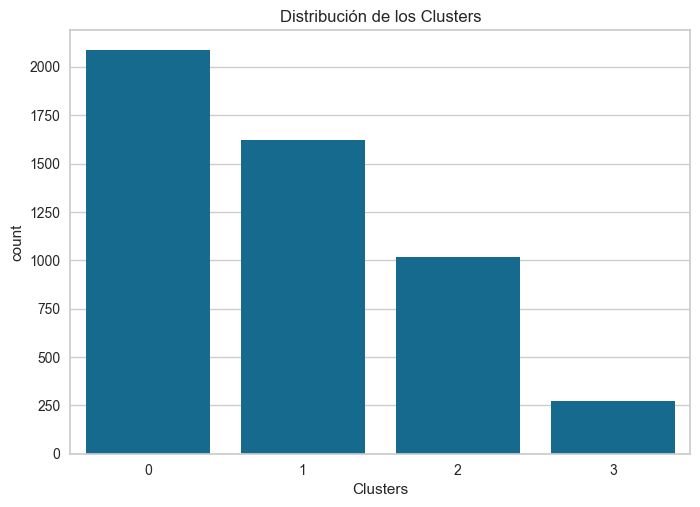

In [22]:
pl = sns.countplot(x=df_5k["Clusters"])
pl.set_title("Distribución de los Clusters")
plt.show()

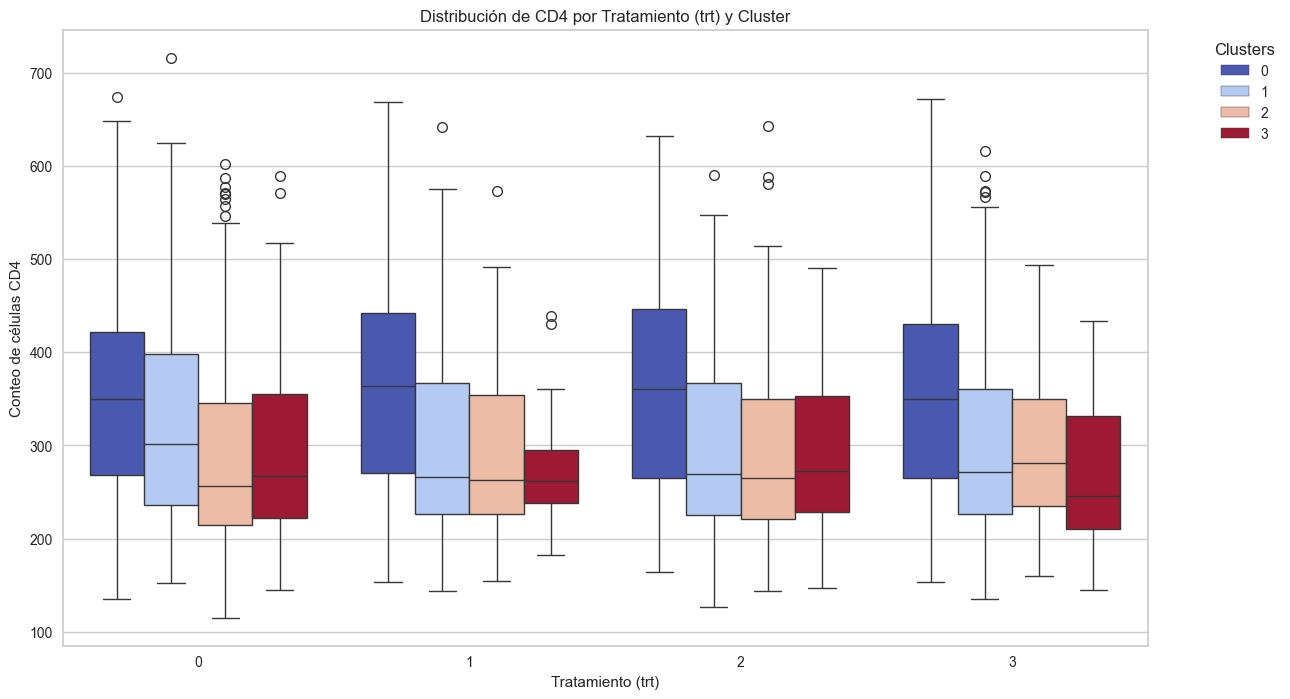

In [23]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_5k, x="trt", y="cd40", hue="Clusters", palette="coolwarm")
plt.title("Distribución de CD4 por Tratamiento (trt) y Cluster")
plt.xlabel("Tratamiento (trt)")
plt.ylabel("Conteo de células CD4")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


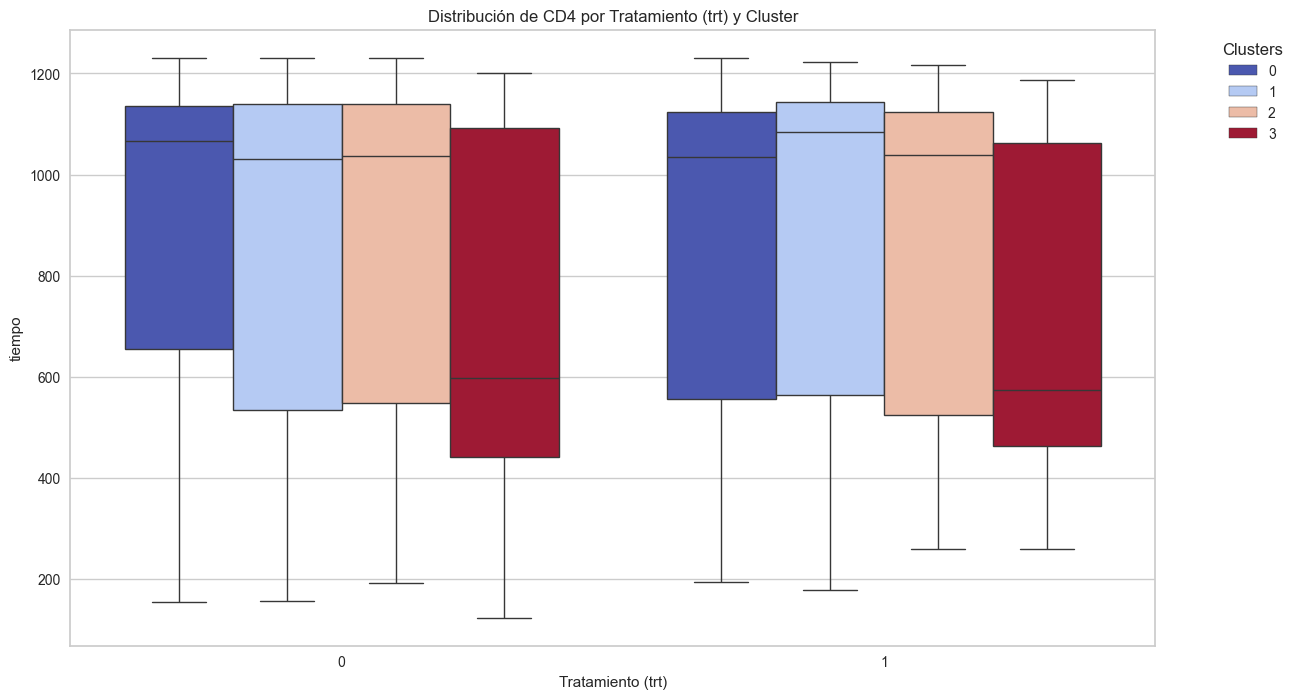

In [24]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_5k, x="drugs", y="time", hue="Clusters", palette="coolwarm")
plt.title("Distribución de CD4 por Tratamiento (trt) y Cluster")
plt.xlabel("Tratamiento (trt)")
plt.ylabel("tiempo")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()  


In [25]:
ax = px.scatter_3d(
    df_5k, 
    x="age",  # Eje X: Edad
    y="wtkg",  # Eje Y: Peso en kilogramos
    z="time",  # Eje Z: Tiempo
    # template="plotly_dark",  # Estilo oscuro
    color="infected",  # Colorear por estado de infección
    width=1000,  # Ancho del gráfico
    height=800  # Altura del gráfico
)
# Mostrar el gráfico interactivo
ax.show()

In [26]:
ax = px.scatter_3d(
    df_5k, 
    x="preanti",  # Eje X: Edad
    y="cd40",  # Eje Y: Peso en kilogramos
    z="cd420",  # Eje Z: Tiempo
    # template="plotly_dark",  # Estilo oscuro
    color="infected",  # Colorear por estado de infección
    width=1000,  # Ancho del gráfico
    height=800  # Altura del gráfico
)
# Mostrar el gráfico interactivo
ax.show()

In [27]:
ax = px.scatter_3d(
    df_5k, 
    x="preanti",  # Eje X: Edad
    y="cd80",  # Eje Y: Peso en kilogramos
    z="cd820",  # Eje Z: Tiempo
    # template="plotly_dark",  # Estilo oscuro
    color="infected",  # Colorear por estado de infección
    width=1000,  # Ancho del gráfico
    height=800  # Altura del gráfico
)
# Mostrar el gráfico interactivo
ax.show()

#   redes neuronales

In [28]:
# Muestreo aleatorio simple para balancear las clases
infected_sample = df_50k[df_50k['infected'] == 1].sample(n=15000, random_state=42)
non_infected_sample = df_50k[df_50k['infected'] == 0].sample(n=15000, random_state=42)

# Combinar ambas muestras para formar un dataset balanceado
balanced_df = pd.concat([infected_sample, non_infected_sample]).sample(frac=1, random_state=42)  # Mezclar filas



In [29]:
# Dividir las variables predictoras y la variable objetivo
X = balanced_df.drop(columns=['infected'])  # Variables predictoras
y = balanced_df['infected']                # Variable objetivo

# Dividir en entrenamiento (70%), validación (15%), prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [30]:
print(f"Entrenamiento - No infectados: {len(y_train[y_train == 0])}")
print(f"Entrenamiento - Infectados: {len(y_train[y_train == 1])}")
print(f"Prueba - No infectados: {len(y_test[y_test == 0])}")
print(f"Prueba - Infectados: {len(y_test[y_test == 1])}")

Entrenamiento - No infectados: 10500
Entrenamiento - Infectados: 10500
Prueba - No infectados: 2250
Prueba - Infectados: 2250


In [31]:
# Construcción del modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilación del modelo
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

c:\Users\thewo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [32]:
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=20,  # Ajusta según el rendimiento
                    batch_size=32,
                    verbose=1)


Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6126 - loss: 0.6595 - val_accuracy: 0.6496 - val_loss: 0.6263
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6484 - loss: 0.6304 - val_accuracy: 0.6493 - val_loss: 0.6297
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6516 - loss: 0.6302 - val_accuracy: 0.6516 - val_loss: 0.6285
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6535 - loss: 0.6300 - val_accuracy: 0.6478 - val_loss: 0.6259
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6523 - loss: 0.6281 - val_accuracy: 0.6504 - val_loss: 0.6264
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6504 - loss: 0.6295 - val_accuracy: 0.6544 - val_loss: 0.6265
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6492 - loss: 0.6293 - val_accuracy: 0.6522 - val_loss: 0.6262
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6568 - loss: 0.6262 - val_accuracy: 0.

In [33]:
# Evaluar el modelo en el conjunto de prueba
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC: {roc_auc:.4f}")


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      2250
           1       0.63      0.68      0.65      2250

    accuracy                           0.64      4500
   macro avg       0.64      0.64      0.64      4500
weighted avg       0.64      0.64      0.64      4500


Matriz de Confusión:
[[1335  915]
 [ 723 1527]]

ROC-AUC: 0.6832


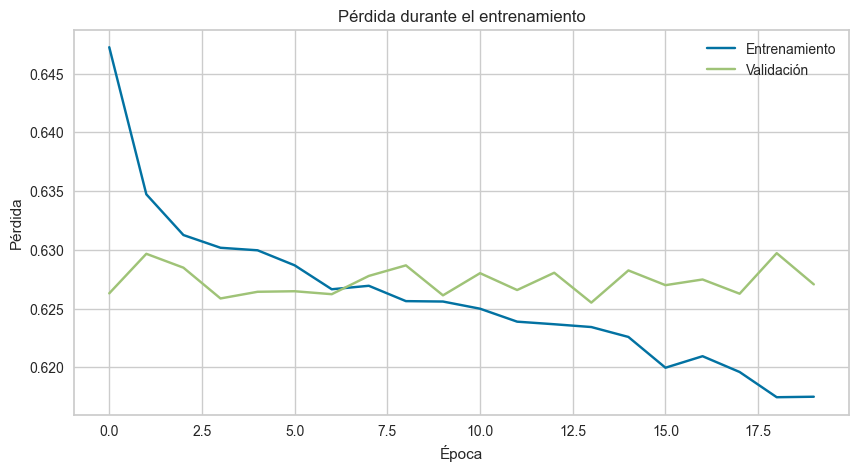

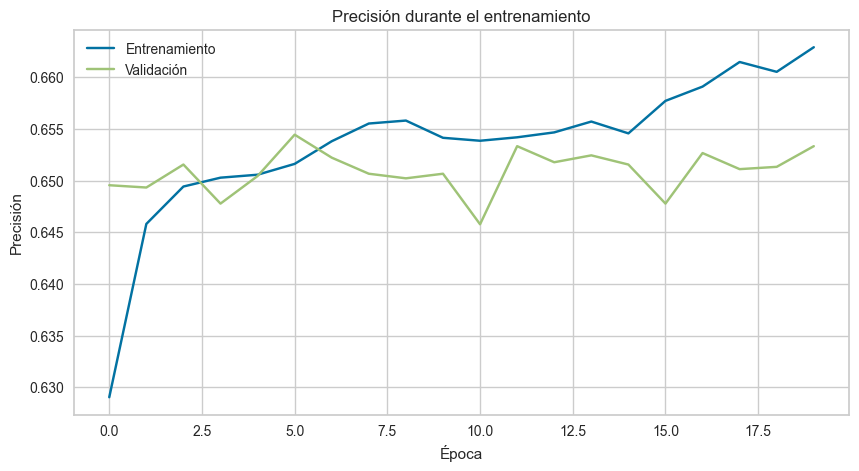

In [34]:
# Gráfica de pérdida
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Gráfica de precisión
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()
